### Requirements

In [26]:
!pip install ultralytics

In [27]:

from zipfile import ZipFile
import os
# The data directory is currently hard-coded, if you want to train in different location you need to change it:
#C:\Users\name\AppData\Roaming\Ultralytics\settings.yaml
# then you need to re-import it
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
import torch
import numpy as np
from PIL import Image  # to display images
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

print(f"Setup complete. Using torch {torch.__version__} on device ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/107.7 GB disk)
Setup complete. Using torch 2.2.1+cu121 on device (CPU)


# Load a model

In [28]:
# Load a model
model = YOLO("yolov8n-seg.pt")  # load a pretrained model

In [29]:
model

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_runnin

# Use the model

In [30]:
# Use the model
results = model.predict(source="https://ultralytics.com/images/bus.jpg", conf=0.25)


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 514.8ms
Speed: 12.1ms preprocess, 514.8ms inference, 38.9ms postprocess per image at shape (1, 3, 640, 480)


### Let's see what the "results" contain

In [31]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [32]:
results[0].boxes.xyxy

tensor([[670.1221, 389.6674, 809.4929, 876.5032],
        [ 49.1363, 395.9715, 241.1689, 904.0948],
        [223.1879, 407.5888, 344.0539, 862.0737],
        [  2.4104, 227.8582, 803.0237, 720.6229],
        [  0.0000, 551.1202,  78.0287, 873.8694],
        [668.6374, 822.8401, 810.0000, 882.0309]])

In [33]:
results[0].boxes.conf

tensor([0.8875, 0.8518, 0.8420, 0.8066, 0.3430, 0.3350])

In [34]:
results[0].boxes.cls

tensor([ 0.,  0.,  0.,  5.,  0., 36.])

In [35]:
results[0].masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0.,

In [36]:
im_array = results[0].masks.data.cpu().numpy()

In [37]:
np.shape(im_array)

(6, 640, 480)

In [38]:
results[0].masks.shape[0]

6

In [39]:
(width,height)=np.shape(results[0].masks.data.detach().cpu().numpy()[0,:,:])

## Let's display the results

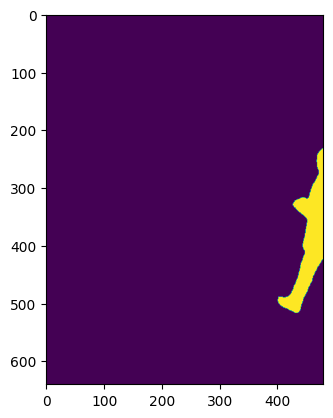

In [40]:
plt.imshow(results[0].masks.data.detach().cpu().numpy()[0,:,:])

In [41]:
def get_colored_mask(mask):

    colors = [[0, 255, 0],[0, 0, 255],[255, 0, 0],[0, 255, 255],[255, 255, 0],[255, 0, 255],[80, 70, 180],[250, 80, 190],[245, 145, 50],[70, 150, 250],[50, 190, 190]]
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    r[mask == 1], g[mask == 1], b[mask == 1] = colors[random.randrange(0,10)]
    colored_mask = np.stack([r, g, b], axis=2)
    return colored_mask

In [42]:
img = cv2.imread("bus.jpg")
img = cv2.resize(img, (height,width), interpolation = cv2.INTER_AREA)
np.shape(img)

(640, 480, 3)

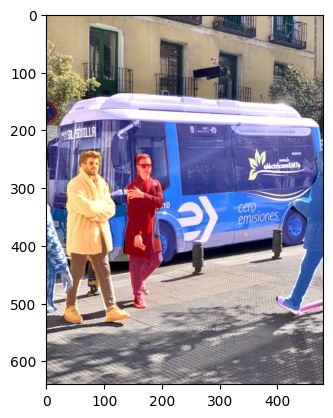

In [43]:
img = cv2.imread("bus.jpg")
img = cv2.resize(img, (height,width), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for r in range(results[0].masks.shape[0]):
    im_array = results[0].masks.data[r,:,:].cpu().numpy()
    rgb_mask = get_colored_mask(results[0].masks.data.detach().cpu().numpy()[r,:,:])
    img = cv2.addWeighted(img, 1, rgb_mask, 0.5, 0)
img = Image.fromarray(img)  # RGB PIL image
plt.imshow(img)
img.show()  # show image

### Dataset

We will use "coco128-seg" dataset for the training. and add the dataset from the Google Drive.

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
!cp "/content/drive/My Drive/Colab Notebooks/Labor 6/segmentation/datasets.zip" "/content"

In [46]:
if os.path.isdir('datasets')==False:
    # loading the datasets.zip and creating a zip object
    with ZipFile("datasets.zip", 'r') as zObject:
        zObject.extractall(path="") # Extracting all the members of the zip into a specific location.

We also need a description of the training containing:
- Location of the data
- Train set
- Validation set
- Test set
- Names

In [47]:
!cp "/content/drive/My Drive/Colab Notebooks/Labor 6/segmentation/coco128-seg.yaml" "/content"

# Let's see how can we train the model

This model works with polygon masks!

In [48]:
!cp "/content/drive/My Drive/Colab Notebooks/Labor 6/conf.yaml" "/content"

In [49]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco128-seg.yaml', cfg='conf.yaml',epochs=2)  # train the model

WARNING ⚠️ 'boxes' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_boxes' instead.
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=None, data=coco128-seg.yaml, epochs=2, time=None, patience=50, batch=32, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=Labor, name=Test, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

train: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to Labor/Test/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to Labor/Test
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G      1.335      3.103      2.256      1.238        454        320: 100%|██████████| 4/4 [00:49<00:00, 12.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.69s/it]


                   all        128        929      0.659      0.423      0.492      0.356      0.685      0.383      0.463      0.282

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      1.381       3.23      2.087      1.247        434        320: 100%|██████████| 4/4 [00:44<00:00, 11.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.52s/it]

                   all        128        929      0.642      0.435      0.488      0.354      0.682      0.389      0.461      0.283



2 epochs completed in 0.039 hours.
Optimizer stripped from Labor/Test/weights/last.pt, 7.0MB
Optimizer stripped from Labor/Test/weights/best.pt, 7.0MB

Validating Labor/Test/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:16<00:00,  8.16s/it]


                   all        128        929       0.66      0.423      0.492      0.357      0.685      0.383      0.463      0.282
                person        128        254      0.717      0.508      0.601      0.396       0.74      0.441      0.535      0.299
               bicycle        128          6      0.562      0.167      0.173      0.153      0.609      0.167      0.167      0.117
                   car        128         46      0.471      0.087      0.101     0.0565       0.54      0.087     0.0974     0.0453
            motorcycle        128          5      0.848          1      0.995      0.742      0.908          1      0.995      0.521
              airplane        128          6      0.881      0.833      0.861      0.768      0.902      0.833      0.955       0.58
                   bus        128          7      0.399      0.571      0.613       0.56      0.493      0.571      0.613      0.498
                 train        128          3       0.58          1   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ac278b93370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,

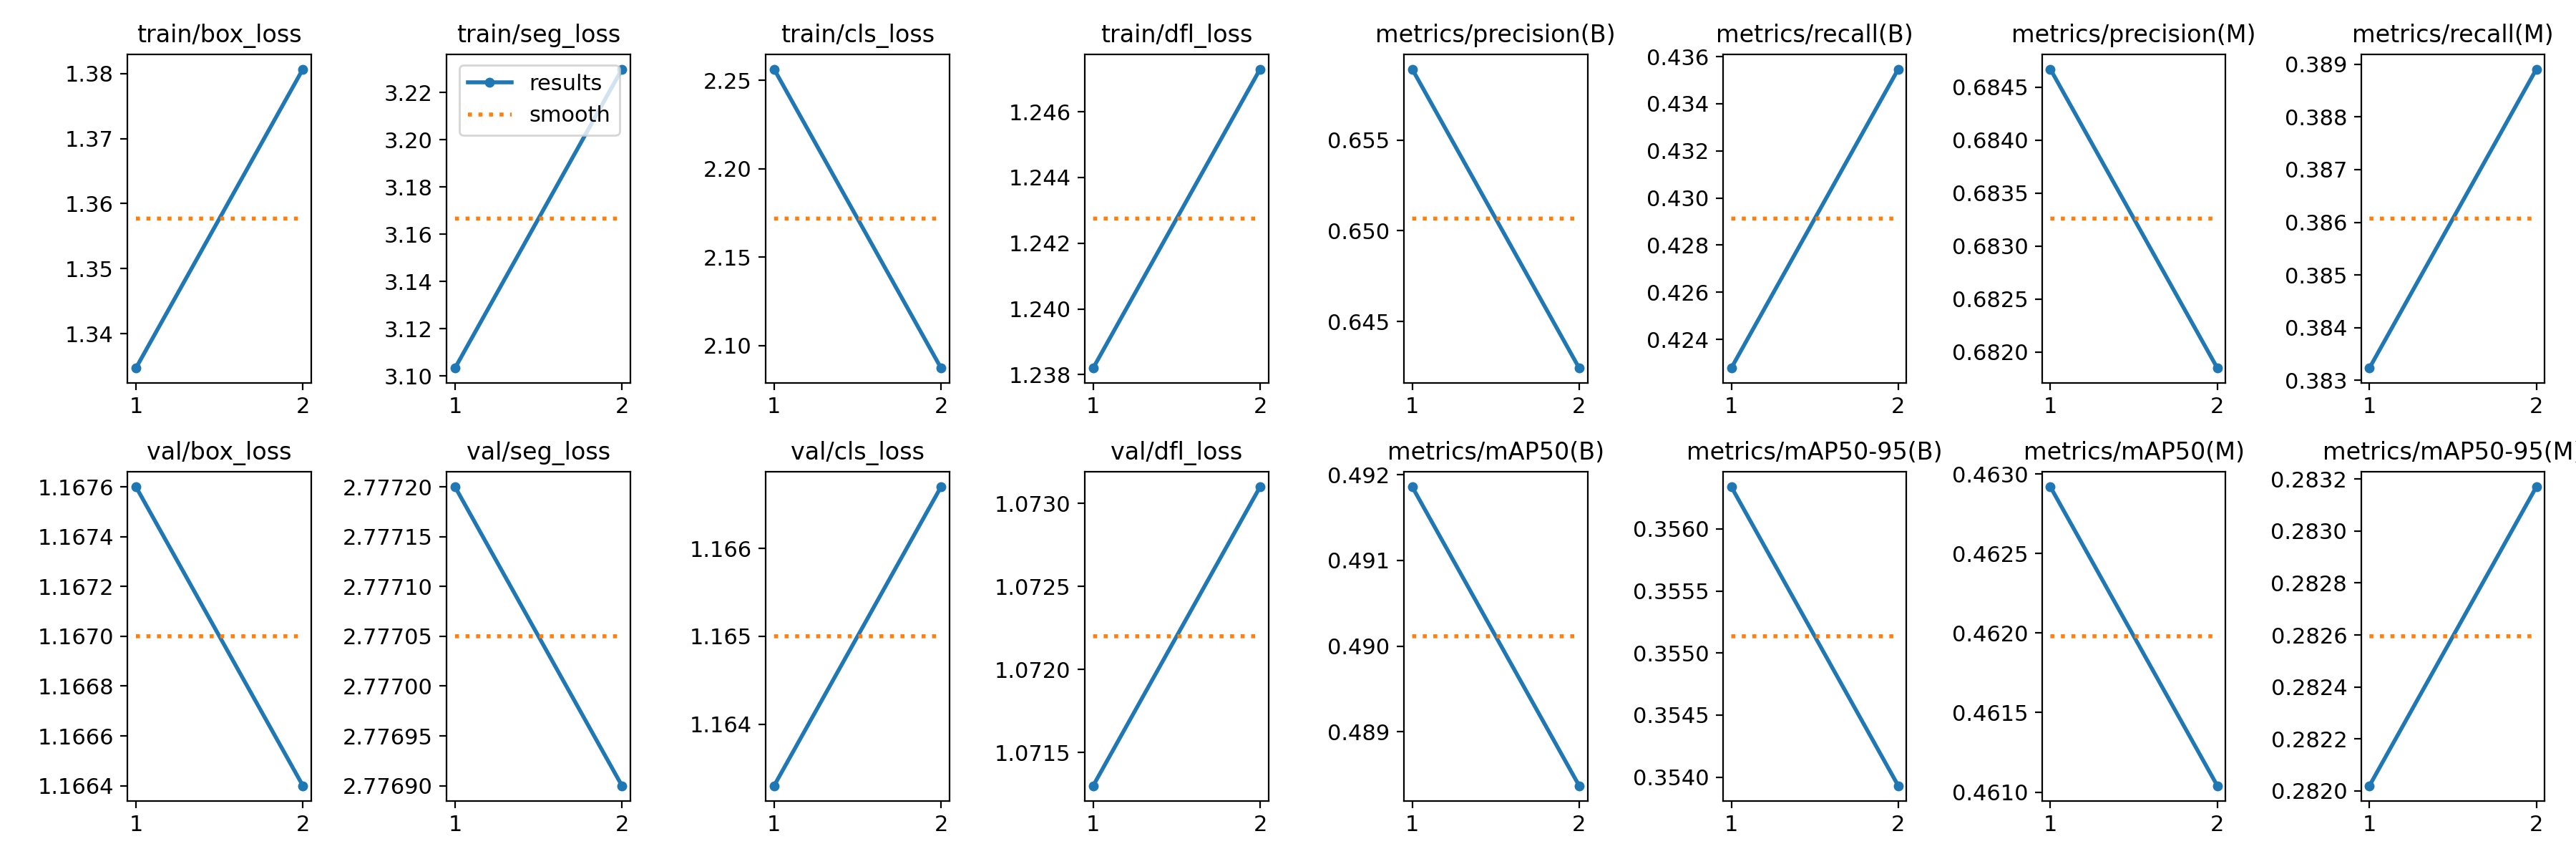

In [50]:
Image.open(os.getcwd()+'/Labor/Test/results.png')

In [51]:
results = model.predict(source='bus.jpg', imgsz= 1280, conf=0.01, iou=0.5, save = True)


image 1/1 /content/bus.jpg: 1280x960 9 persons, 1 motorcycle, 2 buss, 1 train, 1 truck, 1 fire hydrant, 1 stop sign, 1 parking meter, 1 handbag, 5 ties, 2 skateboards, 7 potted plants, 1 vase, 1308.9ms
Speed: 16.9ms preprocess, 1308.9ms inference, 552.3ms postprocess per image at shape (1, 3, 1280, 960)
Results saved to Labor/Test2
